In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Iris.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].value_counts()
# df.shape

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_encoded = le.fit_transform(Y)

In [ ]:
print(y_encoded)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.4,random_state=42)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


0.9833333333333333

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score : ",precision_score(y_test, y_pred,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))

Precision Score :  0.9833333333333333
Recall Score :  0.9833333333333333


F1 SCORE=2*(PRECISION**RECALL)/(PRECISION+RECALL)

In [ ]:
f1=2*((precision_score(y_test, y_pred,average='micro')*recall_score(y_test, y_pred,average='micro'))/(precision_score(y_test, y_pred,average='micro')+recall_score(y_test, y_pred,average='micro')))
print(f1)

0.9833333333333333


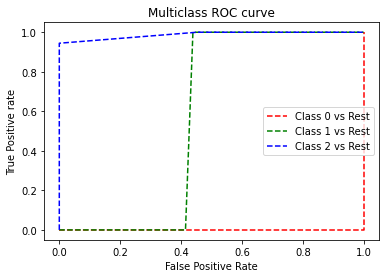

In [ ]:
from sklearn.metrics import roc_curve

fpr={}
tpr={}
thres={}

n_class=3

for i in range(n_class):
  fpr[i],tpr[i],thres[i] = roc_curve(y_test,y_pred, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

DECSION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


0.9833333333333333

In [ ]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test,y_pred, average='micro'))

F1 is:  0.9833333333333333


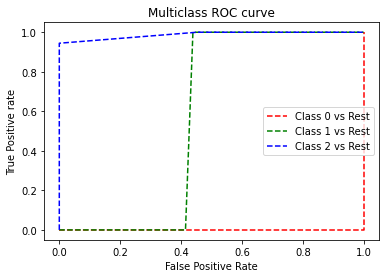

In [ ]:
from sklearn.metrics import roc_curve

fpr={}
tpr={}
thres={}

n_class=3

for i in range(n_class):
  fpr[i],tpr[i],thres[i] = roc_curve(y_test,y_pred, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


0.9833333333333333

In [ ]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test,y_pred, average='micro'))

F1 is:  0.9833333333333333


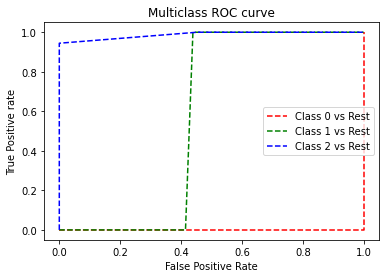

In [ ]:
from sklearn.metrics import roc_curve

fpr={}
tpr={}
thres={}

n_class=3

for i in range(n_class):
  fpr[i],tpr[i],thres[i] = roc_curve(y_test,y_pred, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state =0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


0.9833333333333333

In [ ]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test,y_pred, average='micro'))

F1 is:  0.9833333333333333


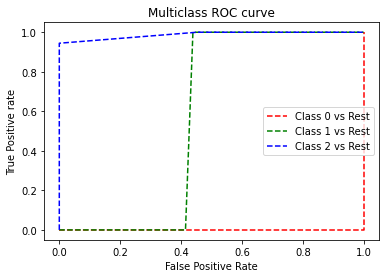

In [ ]:
from sklearn.metrics import roc_curve

fpr={}
tpr={}
thres={}

n_class=3

for i in range(n_class):
  fpr[i],tpr[i],thres[i] = roc_curve(y_test,y_pred, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

CS3035.json

In [40]:
import json
	
# Data to be written
dictionary ={
	"Logstic Regression F1 SCORE" : "0.984",
  "KNN  Model F1 SCORE" : "0.984",
	"Decision Tree F1 SCORE" :"0.984",
	"SVM  F1 SCORE" : "0.984",
}
	
with open("CS3035.json", "w") as outfile:
	json.dump(dictionary, outfile)